# .h5 dataset examination

## Why?

To figure out what's inside and in which format.

In [1]:
# Show what's in the directory we are in
!ls -lh ../data/images
!ls -lh ../data/images/raw
!ls -lh ../data/images/depths 
!ls -lh ../data/images/segs 
!ls -lh ../data/images/labels 

total 0
drwxr-xr-x  3 NickBook  staff    96B Nov  4 20:58 depths
drwxr-xr-x  4 NickBook  staff   128B Nov  4 21:46 labels
drwxr-xr-x  5 NickBook  staff   160B Nov  4 20:48 raw
drwxr-xr-x  3 NickBook  staff    96B Nov  4 20:58 segs
total 1136
-rw-r--r--@ 1 NickBook  staff   207K Nov  4 20:48 brick_wall.jpg
-rw-r--r--@ 1 NickBook  staff   147K Oct 31 20:54 curved_paper.jpg
-rw-r--r--  1 NickBook  staff   210K Nov  3 02:46 garold.jpg
total 4624
-rw-r--r--  1 NickBook  staff   2.3M Nov  4 20:58 depths.h5
total 5152
-rw-r--r--  1 NickBook  staff   2.5M Nov  4 20:58 segs.h5
total 4144
-rw-r--r--  1 NickBook  staff   2.0M Nov  5 01:16 labels.h5
-rw-r--r--  1 NickBook  staff   6.0K Nov  4 21:46 labels.png


In [2]:
import os
import os.path as osp
import h5py
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Print dataset as a tree
def print_attrs(name, obj):
    print(name)
    for key, val in obj.attrs.items():
        print ("    %s: %s" % (key, val))

## Open dataset and see, what's inside

In [67]:
db_path = osp.abspath('../results/SynthText.h5')
db = h5py.File(db_path,'r')

In [68]:
db.visititems(print_attrs)

data
data/curved_paper.jpg_0
    charBB: [[[234.82491942 253.08407865 263.5947596  272.217221   292.19875136
    90.82156127 103.88601193 112.90879429  81.11683702  91.96193416
   101.49528334 110.85308566 120.04014565 248.45142391 260.84200715
   272.73035826 279.97088299  97.06966912 109.45385423 123.19687944
   133.9599316   77.07523757  85.70996171  90.60115595  98.69047827
   107.49249553 114.50895888 196.48846985 209.62137053 226.46423874
   239.28672644 248.93452424 271.7962399   63.83605749  75.18851162
    83.94895067 261.38576525 268.26209288 276.01847174 281.20149915
   296.80900087 300.39636038 305.72420755 312.7007309  323.01788933]
  [248.29527125 264.96376898 272.09115977 284.14762309 299.94454369
   102.93738614 113.80224877 123.52641375  91.82402547 101.49528334
   110.85308566 120.04014565 129.06109412 265.68054278 269.4651136
   282.26932997 291.25537382 108.48713546 120.70977903 133.9599316
   147.09056584  84.61989756  91.24575107  97.78095148 105.74165363
   113.5

## Check the segmentation dataset segs.h5

Dataset attributes:
names
ucms
ucms/brick_wall.jpg
ucms/curved_paper.jpg
ucms/garold.jpg

Names: curved_paper.jpg, garold.jpg, brick_wall.jpg
Image: brick_wall.jpg


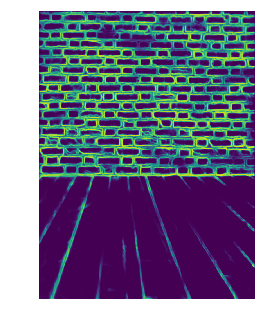

In [10]:
segs_db = h5py.File('../data/images/segs/segs.h5', 'r')
print('Dataset attributes:')
segs_db.visititems(print_attrs)
print('\nNames:', ', '.join([n[0].decode() for n in list(segs_db['names'])]))

# Check the segmentation image
IMAGE = 2
print('Image:', segs_db['names'][IMAGE][0].decode())
pixels = segs_db['ucms'][segs_db['names'][IMAGE, 0]][:] 
fig, ax = plt.subplots()
ax.set_axis_off()
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
im = ax.imshow(pixels)

# SAVE and show the image
# fig.savefig('out_segmented.png', bbox_inches='tight', pad_inches=0)
plt.show()
segs_db.close()

## Check labeled dataset labels.h5

We have passed the dataset `segs.h5` prepared before as an output of `pytorch-hed/run.py` file. Now we want to get labels and areas (and segments) using `SynthText3/prep_scripts/floodFill.py` script. The script takes the dataset described above as input and returns labeled dataset `labels.h5` as output. Let's see, what we have got at the end:

In [9]:
segs_db.close()

Dataset attributes:
mask
mask/brick_wall.jpg
    area: [442444    622   7363      9     25     55      1     28    783  10534
   4932   1216    311      7     22     77    157   7893     19 229874
     20      5    212    473  19418    706   2220     31      5      2
   6307   7592   6121    225    804    263    307   1391    179    762
      1      2    509   4446      2      3   3740   5958   7216  20284
      4      3     28      8     43      3   2110     44   2128     10
      4      3   3558      8      8      4   2168     34    412]
    label: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
mask/garold.jpg
    area: [    37    132     11    390     78   1881     19    285    159      6
     56   1970  32932      2      4      1    298      2    246     75
      2    198    534     87   1132    773     16  23331     16 

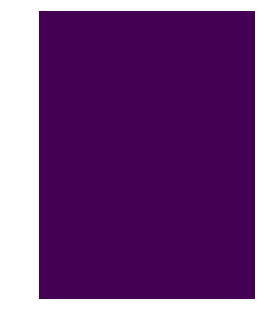

In [21]:
labels_db = h5py.File('../data/images/labels/labels.h5', 'r')
print('Dataset attributes:')
labels_db.visititems(print_attrs)
# print('\nNames:', ', '.join([n[0].decode() for n in list(labels_db['names'])]))

# Check the segmentation image
IMAGE = 'garold.jpg'
# print('Image:', segs_db['names'][IMAGE][0].decode())
pixels = labels_db['mask'][IMAGE][:] 
fig, ax = plt.subplots()
ax.set_axis_off()
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
im = ax.imshow(pixels)

# SAVE and show the image
# fig.savefig('out_segmented.png', bbox_inches='tight', pad_inches=0)
plt.show()
labels_db.close()

In [23]:
!ls ../data

dset.h5  fonts	models	newsgroup


In [4]:
original_dset = h5py.File('../data/dset.h5', 'r')
original_dset.visititems(print_attrs)

depth
depth/curved_paper.jpg
image
image/curved_paper.jpg
seg
seg/curved_paper.jpg
    area: [    37    132     11    390     78   1881     19    285    159      6
     56   1970  32932      2      4      1    298      2    246     75
      2    198    534     87   1132    773     16  23331     16   2300
     10      1    142     56     92    338      2    391 103544     63
  15329      1   4471  13328      4   1021   2035      1     85      2
    974    135      6    525    281   3296    244 153663    897    179
      1    210      4   1522     43      1   1903     83    813    309
     36      4  25951    389      1    124   4987     28     99]
    label: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79]


In [8]:
# Collect everything into one single dataset
out_dset = h5py.File(osp.abspath('../results/curved_paper.h5'), 'w')
out_dset.create_group('depth')
out_dset.create_group('image')
out_dset.create_group('seg')

<HDF5 group "/seg" (0 members)>

In [12]:
list(original_dset['image'].attrs)

[]

In [119]:
# load data from prepared datasets to join them together
depth = np.squeeze(np.load('/home/gayduchenko/data/curved_paper.jpg_depth.npy'))
image = np.asarray(Image.open('/home/gayduchenko/data/curved_paper.jpg'))
segs = h5py.File('/home/gayduchenko/data/curved_paper_labels.h5', 'r')

In [131]:
print(np.isinf(depth).any())
print(np.isnan(depth).any())

False
False


In [121]:
out_dset['depth'].create_dataset('curved_paper.jpg', data=depth)
out_dset['image'].create_dataset('curved_paper.jpg', data=image)
out_dset['seg'].create_dataset('curved_paper.jpg', data=segs['mask/image_0'][:])

<HDF5 dataset "curved_paper.jpg": shape (1022, 766), type "<u2">

In [122]:
for key in segs['mask/image_0'].attrs.keys():
    out_dset['seg/curved_paper.jpg'].attrs[key] = segs['mask/image_0'].attrs[key].copy()

In [123]:
out_dset.visititems(print_attrs)

depth
depth/curved_paper.jpg
image
image/curved_paper.jpg
seg
seg/curved_paper.jpg
    area: [    37    132     11    390     78   1881     19    285    159      6
     56   1970  32932      2      4      1    298      2    246     75
      2    198    534     87   1132    773     16  23331     16   2300
     10      1    142     56     92    338      2    391 103544     63
  15329      1   4471  13328      4   1021   2035      1     85      2
    974    135      6    525    281   3296    244 153663    897    179
      1    210      4   1522     43      1   1903     83    813    309
     36      4  25951    389      1    124   4987     28     99]
    label: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79]


In [124]:
out_dset.close()

# SynthText resulting dataset examination

In [24]:
synth_dset = h5py.File('curved_paper.h5', 'r')

In [25]:
synth_dset.visititems(print_attrs)

data
data/curved_paper.jpg_0
    charBB: [[[ 93.71273929  93.8628502   93.40620065 218.64356753 232.62971605
   236.51747072 241.16298333 247.82972859 252.18198599 259.60468171
   271.17383607 271.05826588 282.8507121  277.99308278 296.89634628
   293.68891163 239.55423577 250.44960298 259.67693525 262.67624734
   275.32851959 284.59858193 290.31115928  26.910612    35.67891803
    44.63482367  23.68712205  33.84111826  42.7227763  207.08472765
   210.66505648 213.20003732 221.42040856 225.01032246 227.56533161
   232.91659247 241.09303571 249.48556937 253.09428521 259.59607672
   228.17395549 231.14213896 238.49985677 255.45636868 261.30574939
   271.28625   ]
  [ 93.23607247  93.47817886  92.92213998 229.63585007 238.84270911
   242.71847287 244.60399737 255.44587412 256.3199366  267.93194251
   276.0575934  274.52455966 286.35869721 288.41204972 300.41346798
   297.17902696 248.03087056 258.96657874 267.49704574 271.17400162
   283.88493458 291.02565655 293.88459108  35.45009676  46

In [26]:
def show_and_save_image(dset, imname, path):
    pixels = dset[imname][:]
    fig, ax = plt.subplots()
    ax.set_axis_off()
    fig.subplots_adjust(bottom = 0)
    fig.subplots_adjust(top = 1)
    fig.subplots_adjust(right = 1)
    fig.subplots_adjust(left = 0)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    im = ax.imshow(pixels)

    # SAVE and show the image
    import os.path as osp
    fig.savefig(osp.join(path), bbox_inches='tight', pad_inches=0)
    plt.show()  
    return im

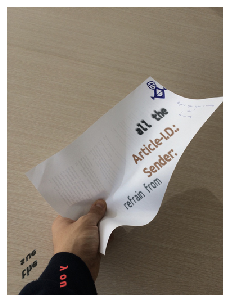

In [27]:
show_and_save_image(synth_dset, 'data/curved_paper.jpg_0', 'curved_paper_synth.png')

In [28]:
synth_dset.close()

In [29]:
!open .